#Without performing any Text Prepeocessing or Feature Engineering

In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv',engine='python',on_bad_lines='skip')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [ ]:
df['question2'][0]

'What is the step by step guide to invest in share market?'

In [ ]:
# checking the shape of dataset
df.shape

(404290, 6)

In [ ]:
# checking the distribution of duplicate and non-duplicate values
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255027
1,149263


In [ ]:
# checking for null values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

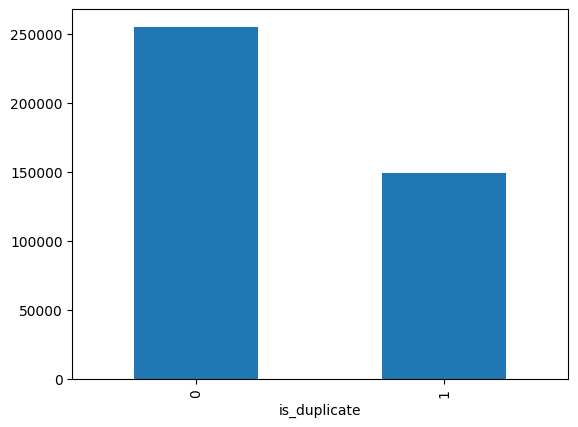

In [ ]:
# ploting the bar graph for the distribution of duplicate and non-duplicate values
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# finding the number of question repeated
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())  # combining qid1 and qid2 and then converting it into pandas series
print("Number of unique question",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting repeated",x[x].shape[0])

# true to values which are repeated
# false to values which are non-repeated

Number of unique question 537933
Number of questions getting repeated 111780


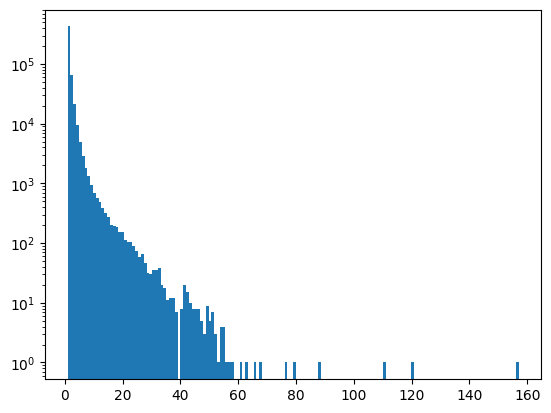

In [ ]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
# Here we are taking only 30000 rows and extracting question1,question2,and is_duplicate
# column and applying Randomforest

In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.shape

(30000, 6)

In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df.duplicated().sum()

np.int64(0)

In [ ]:
new_df = new_df[['question1','question2']]

In [ ]:
new_df

,question1,question2
170700,How do I export or save as the current selecte...,How exactly do producers raise funds to financ...
298659,Why do people follow the Quora Content Review ...,What do people think of Quora Content Review?
44435,If I want to make friends with English native ...,What are the best ways to find native English ...
292777,I love physics. I can't seem to understand and...,How do I understand this physics concept?
293222,Where can I find a 3DS emulator and a Pokémon ...,Where can I find emulators for Pokémon games?
...,...,...
306548,How much does a professional footballer in the...,Why don't NCAA Division 1 players get paid?
403818,I wanted to learn how much importance does GaT...,What are some universities that give funding f...
72026,How does organize crime work?,How does organized crime work?
402262,Can we expect time travel to become a reality?,Is time travel possible through cosmic strings?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# now combining both the question column
questions = list(new_df['question1']) + list(new_df['question2'])

In [ ]:
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) # applying bow and then spliting the questions into two equal halfs
temp_df1 = pd.DataFrame(q1_arr,index=new_df.index)            # converting each array (q1 and q2 embeddings) into a DataFrame
temp_df2 = pd.DataFrame(q2_arr,index=new_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)             # now joining the two dataframe

In [ ]:
temp_df.shape

# here we have 6000 features as temp_df1 has 3000 feature and temp_df2 has 3000 features

(30000, 6000)

In [ ]:
#temp_df['is_duplicate'] = df.loc[new_df.index, 'is_duplicate']

In [ ]:
temp_df['is_duplicate'] = df['is_duplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
170700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# separating the features and result
x = temp_df.drop(columns='is_duplicate')
y = temp_df['is_duplicate']

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
170700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,is_duplicate
170700,0
298659,0
44435,0
292777,0
293222,0
...,...
306548,0
403818,0
72026,1
402262,1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# model training
# using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.75

In [ ]:
# using xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train)
y_pred2 = xgb.predict(x_test.values)
accuracy_score(y_test,y_pred2)

0.7368333333333333

#Performing Text Preprocessing

In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv',engine='python',on_bad_lines='skip')

In [ ]:
new_df2 = df.sample(30000,random_state=2)

In [ ]:
new_df2.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

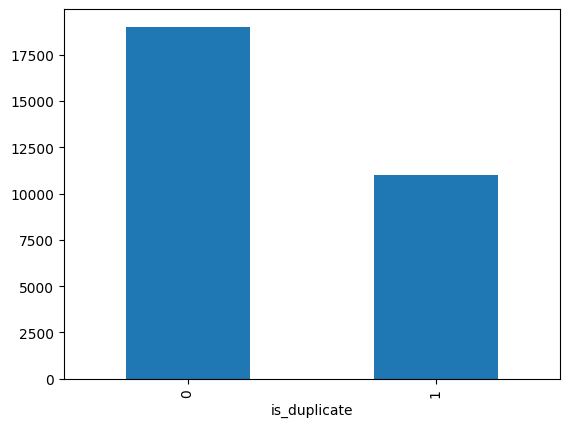

In [ ]:
# plotting histogram
print(new_df2['is_duplicate'].value_counts())
print(new_df2['is_duplicate'].value_counts()/new_df2['is_duplicate'].count()*100)
new_df2['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# repeated question
qid_ = pd.Series(new_df2['qid1'].tolist() + new_df2['qid2'].tolist())
print("Number of unique questions",np.unique(qid_).shape[0])
x = qid_.value_counts()>1
print("Number of repeated questions",x[x].shape[0])

Number of unique questions 55299
Number of repeated questions 3480


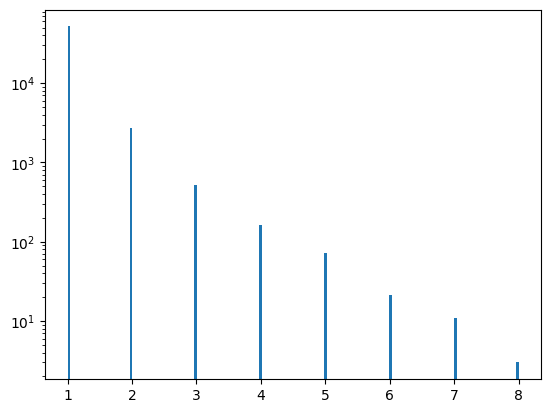

In [ ]:
# Repeated question histogram
plt.hist(qid_.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

Now i am adding 7 more features (which are made by me)

currently dataset has 60000 features after adding 7 it became 60007

7 features are as follows:
1. question1 length
2. question2 length
3. words in question1
4. words in question2
5. common unique words
6. Total words in ques1 and ques2
7. Total shared words

**Feature Engineering**

In [ ]:
# counting the length of question1 and question2 for each row
new_df2['q1_len'] = df['question1'].str.len()
new_df2['q2_len'] = df['question2'].str.len()

In [ ]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76.0,77.0
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49.0,57.0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105.0,120.0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35.0,50.0


In [ ]:
# counting the number of words in question1 and question2 for each row
new_df2['q1_words'] = new_df2['question1'].apply(lambda row : len(row.split(" ")))
new_df2['q2_words'] = new_df2['question2'].apply(lambda row : len(row.split(" ")))

In [ ]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76.0,77.0,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49.0,57.0,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105.0,120.0,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35.0,50.0,5,9


In [ ]:
# finding common unique words in question1 nad question2
def common_words(row):
  w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df2['common_words'] = new_df2.apply(common_words,axis=1)

In [ ]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76.0,77.0,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49.0,57.0,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105.0,120.0,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35.0,50.0,5,9,3


In [ ]:
df.iloc[367788]['question2']

'My boyfriend doesnt feel guilty when he hurts me. He cried when he was telling me how he killed a cat when he was young. Could he be a psychopath?'

In [ ]:
# calculating total number of words
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
new_df2['total_words'] = new_df2.apply(total_words, axis=1)

In [ ]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76.0,77.0,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49.0,57.0,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105.0,120.0,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35.0,50.0,5,9,3,13


In [ ]:
# word share
new_df2['word_share'] = round(new_df2['common_words']/new_df2['total_words'],2)
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76.0,77.0,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49.0,57.0,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105.0,120.0,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35.0,50.0,5,9,3,13,0.23


**Performing EDA**

Minimum character 2.0
Maximum character 391.0
Average character 59.7133


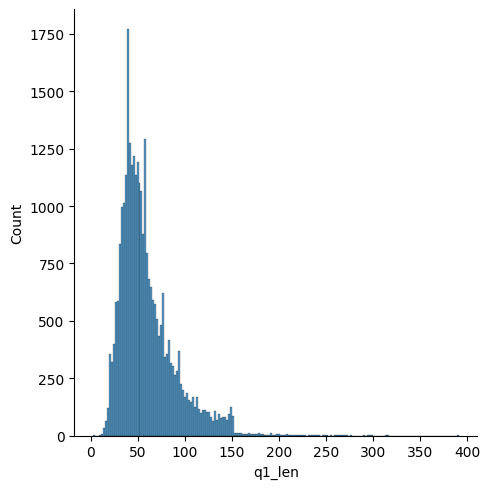

In [ ]:
# analysis of features
# for q1_length
import seaborn as sns
sns.displot(new_df2['q1_len'])
print("Minimum character",new_df2['q1_len'].min())
print("Maximum character",new_df2['q1_len'].max())
print("Average character",new_df2['q1_len'].mean())

Minimum character 6.0
Maximum character 1151.0
Average character 60.29343333333333


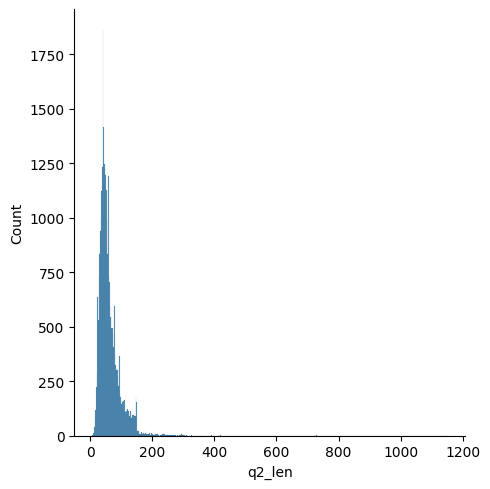

In [ ]:
#for q2_len
sns.displot(new_df2['q2_len'])
print("Minimum character",new_df2['q2_len'].min())
print("Maximum character",new_df2['q2_len'].max())
print("Average character",new_df2['q2_len'].mean())

Minimum words 1
Maximum words 72
Average words 10.969133333333334


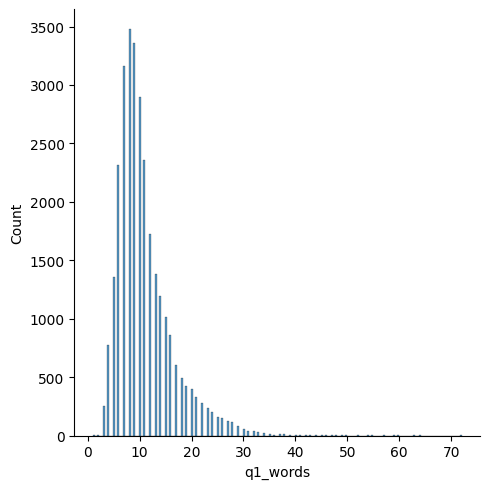

In [ ]:
# ploting for number of words in q1
sns.displot(new_df2['q1_words'])
print("Minimum words",new_df2['q1_words'].min())
print("Maximum words",new_df2['q1_words'].max())
print("Average words",new_df2['q1_words'].mean())

Minimum words 1
Maximum words 237
Average words 11.232133333333334


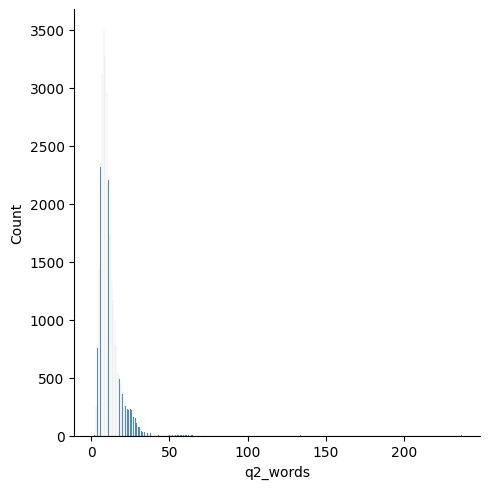

In [ ]:
# ploting for number of words in q2
sns.displot(new_df2['q2_words'])
print("Minimum words",new_df2['q2_words'].min())
print("Maximum words",new_df2['q2_words'].max())
print("Average words",new_df2['q2_words'].mean())

/tmp/ipython-input-2790443182.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==0]['common_words'],label='non_duplicate')
/tmp/ipython-input-2790443182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==1]['common_words'],label

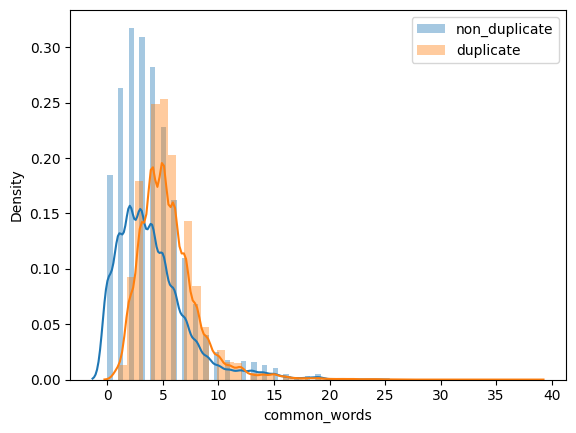

In [ ]:
# ploting for common words
sns.distplot(new_df2[new_df2['is_duplicate']==0]['common_words'],label='non_duplicate')
sns.distplot(new_df2[new_df2['is_duplicate']==1]['common_words'],label='duplicate')
plt.legend()
plt.show()

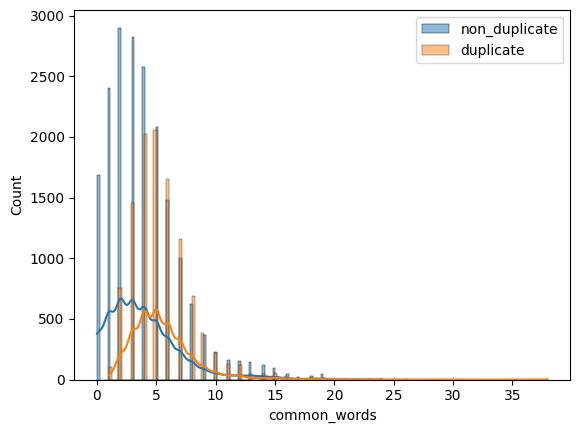

In [ ]:
sns.histplot(
    new_df2[new_df2['is_duplicate'] == 0]['common_words'],
    label='non_duplicate',
    kde=True
)

sns.histplot(
    new_df2[new_df2['is_duplicate'] == 1]['common_words'],
    label='duplicate',
    kde=True
)

plt.legend()


/tmp/ipython-input-231982844.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==0]['total_words'],label='non_duplicate')
/tmp/ipython-input-231982844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==1]['total_words'],label='du

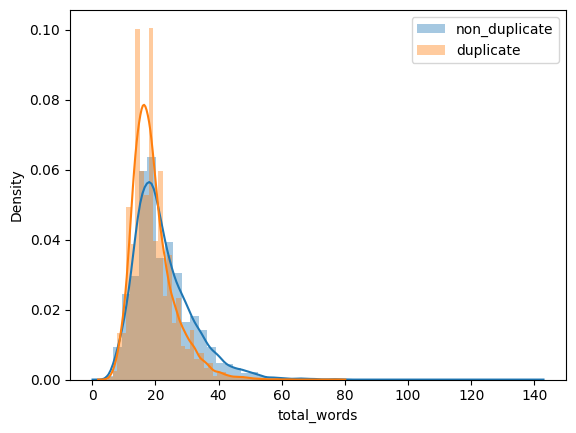

In [ ]:
# ploting for total_words
sns.distplot(new_df2[new_df2['is_duplicate']==0]['total_words'],label='non_duplicate')
sns.distplot(new_df2[new_df2['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipython-input-1144484376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==0]['word_share'],label='non_duplicate')
/tmp/ipython-input-1144484376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[new_df2['is_duplicate']==1]['word_share'],label='du

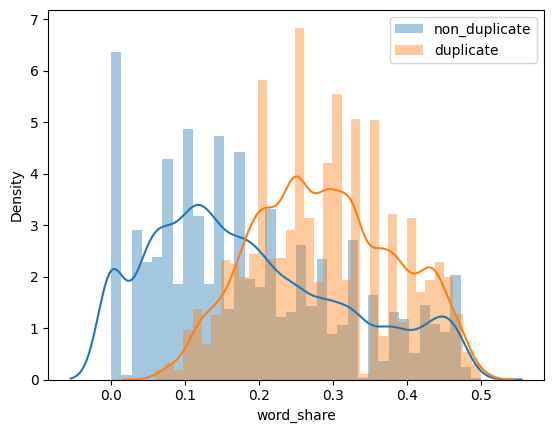

In [ ]:
# word share
sns.distplot(new_df2[new_df2['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.distplot(new_df2[new_df2['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df = new_df2[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
final_df = new_df2.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
398782,1,76.0,77.0,12,12,11,24,0.46
115086,0,49.0,57.0,12,15,7,23,0.30
327711,0,105.0,120.0,25,17,2,34,0.06
367788,0,59.0,146.0,12,30,0,32,0.00
151235,0,35.0,50.0,5,9,3,13,0.23


In [ ]:
# now applying BOW on ques_df
from sklearn.feature_extraction.text import CountVectorizer
# merging the text
merge_ques = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(merge_ques).toarray(),2)
q1_arr.shape

(30000, 3000)

In [ ]:
# now converting q1_arr,q2_arr into dataframe
temp1_df = pd.DataFrame(q1_arr,index = ques_df.index)
temp2_df = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp1_df,temp2_df],axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df =pd.concat([final_df, temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76.0,77.0,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49.0,57.0,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105.0,120.0,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59.0,146.0,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35.0,50.0,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# separating the features and target
x = final_df.drop(columns=['is_duplicate'])
y = final_df['is_duplicate']

In [ ]:
x

,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,0,1,2,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,76.0,77.0,12,12,11,24,0.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,49.0,57.0,12,15,7,23,0.30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,105.0,120.0,25,17,2,34,0.06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,59.0,146.0,12,30,0,32,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,35.0,50.0,5,9,3,13,0.23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,42.0,41.0,7,7,6,14,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,68.0,61.0,12,12,4,24,0.17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,73.0,98.0,14,17,4,30,0.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,51.0,45.0,10,10,5,20,0.25,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,is_duplicate
398782,1
115086,0
327711,0
367788,0
151235,0
...,...
243932,1
91980,0
266955,0
71112,1


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7725

In [ ]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred2 = xgb.predict(x_test)
accuracy_score(y_test,y_pred2)

0.7625